In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Data Information:

This dataset contains information on patients with lung cancer, including their age, gender, air pollution exposure, alcohol use, dust allergy, occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking, passive smoker, chest pain, coughing of blood, fatigue, weight loss ,shortness of breath ,wheezing ,swallowing difficulty ,clubbing of finger nails and snoring

1. lack of info which gender is which
2. the categorigal data describes how severe a given feature is

In [3]:
df = pd.read_csv('/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv')

In [4]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [6]:
df.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.00,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.00,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.00,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.00,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.00,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.00,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.00,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.00,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.00,7.0


In [8]:
df.drop(["Patient Id" , "index"], axis = 1 , inplace = True)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [9]:
df.replace({'Level': {'Low': 1, 'Medium': 2, 'High': 3}}, inplace=True)
df.head()


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("****************")

Age
[33 17 35 37 46 52 28 44 64 39 34 27 73 36 14 24 53 62 29 65 38 19 42 32
 25 45 26 48 22 18 23 47 61 55 31 49 43 51 54 63]
****************
Gender
[1 2]
****************
Air Pollution
[2 3 4 7 6 5 1 8]
****************
Alcohol use
[4 1 5 7 8 3 6 2]
****************
Dust Allergy
[5 6 7 4 2 8 1 3]
****************
OccuPational Hazards
[4 3 5 7 2 6 8 1]
****************
Genetic Risk
[3 4 5 6 7 2 1]
****************
chronic Lung Disease
[2 4 7 6 3 5 1]
****************
Balanced Diet
[2 6 7 4 5 3 1]
****************
Obesity
[4 2 7 3 5 6 1]
****************
Smoking
[3 2 7 8 1 6 5 4]
****************
Passive Smoker
[2 4 3 7 6 8 5 1]
****************
Chest Pain
[2 4 7 3 6 5 9 8 1]
****************
Coughing of Blood
[4 3 8 9 1 5 7 6 2]
****************
Fatigue
[3 1 8 4 5 9 2 6]
****************
Weight Loss
[4 3 7 2 6 5 1 8]
****************
Shortness of Breath
[2 7 9 3 4 5 6 1]
****************
Wheezing
[2 8 1 4 6 7 5 3]
****************
Swallowing Difficulty
[3 6 1 4 2 5 8 7]
*************

<Axes: xlabel='Age', ylabel='count'>

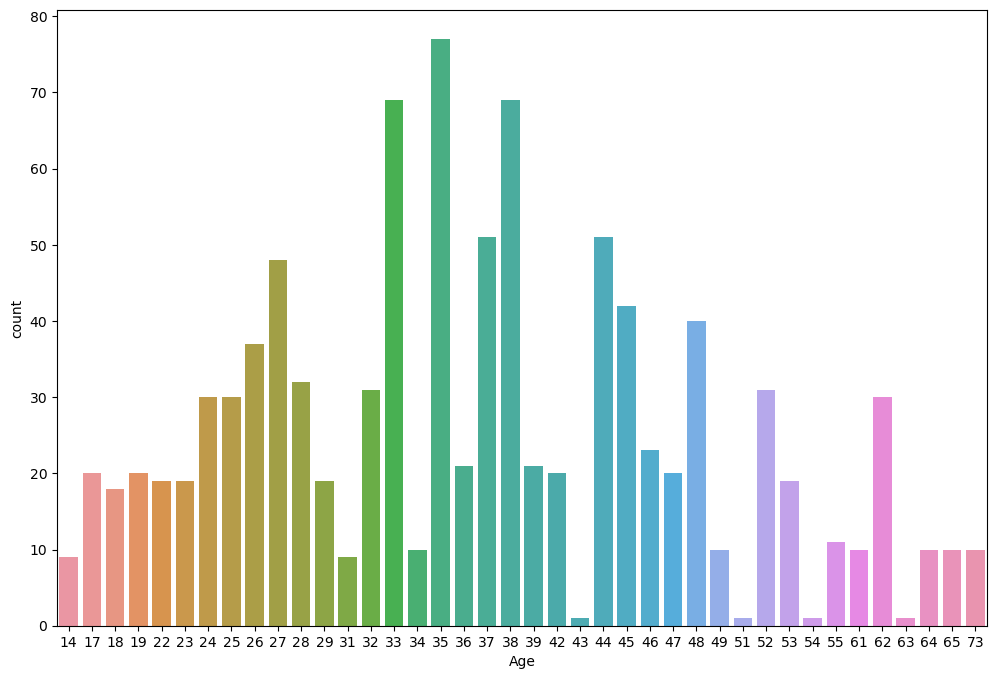

In [11]:
plt.figure(figsize=(12,8), dpi = 100)
sns.countplot(data=df,
             x='Age')

In [12]:
# very huge plot, makes no sense
# plt.figure(figsize=(12,8), dpi = 100)
# sns.pairplot(data=df,
#             hue='Level')

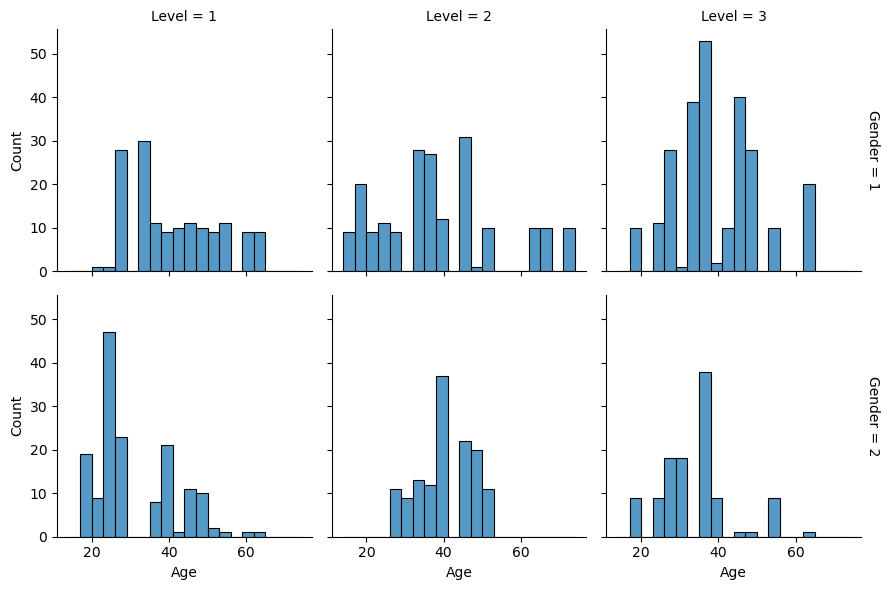

In [13]:
sns.displot(
    df, x="Age", col="Level", row="Gender",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

<Axes: >

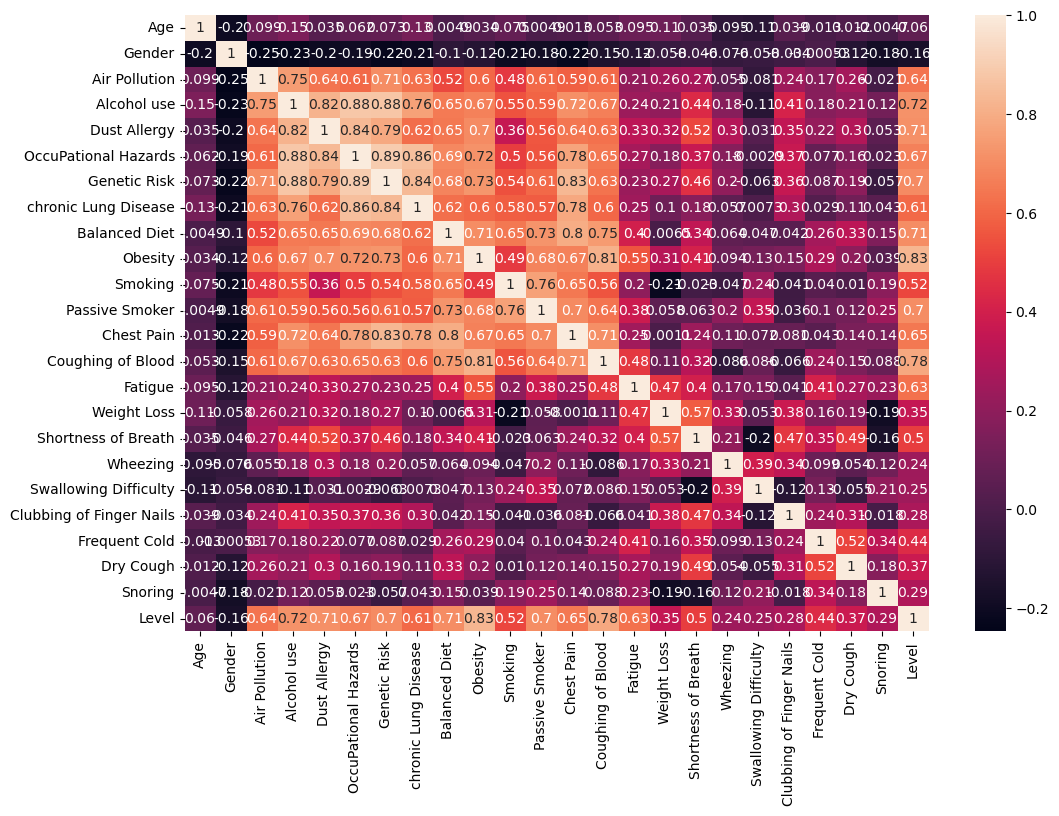

In [14]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=100
                      )
sns.heatmap(df.corr(), annot=True, ax=ax)

In [15]:
# We will now split the data into training set and test set

X = df.drop('Level', axis=1)
y =df['Level']

In [16]:
X.shape

(1000, 23)

In [17]:
y.shape

(1000,)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y, 
                                                     test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [21]:
clf = RandomForestClassifier()
clf.fit(scaled_X_train,y_train)

RandomForestClassifier()

In [22]:
predictions = clf.predict(scaled_X_test)

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<Axes: >

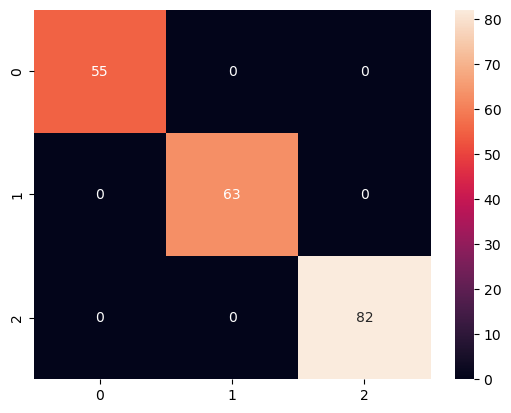

In [24]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

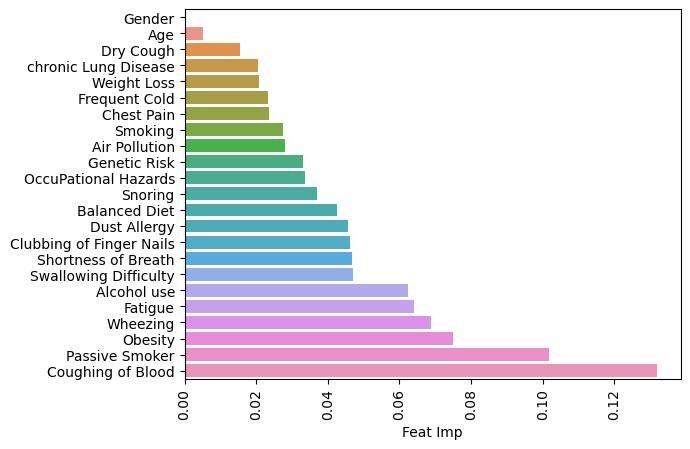

In [25]:
important_feat = pd.DataFrame(data= clf.feature_importances_,
                              index = X.columns,
                              columns=['Feat Imp'])
important_feat = important_feat.sort_values('Feat Imp')

important_feat = important_feat[important_feat['Feat Imp'] > 0]

sns.barplot(data=important_feat,
           y=important_feat.index,
           x='Feat Imp')

plt.xticks(rotation=90);